# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kelibia
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | inverloch
Processing Record 8 of Set 1 | pisz
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | saipan
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | ironwood
Processing Record 18 of Set 1 | mount pearl
Processing Record 19 of Set 1 | leava
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | argo
Processing Record 23

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kelibia,36.8476,11.0939,26.56,65,0,3.84,TN,1721506018
1,adamstown,-25.0660,-130.1015,15.80,86,100,9.14,PN,1721505740
2,puerto natales,-51.7236,-72.4875,7.25,61,40,12.86,CL,1721505749
3,east london,-33.0153,27.9116,14.64,68,94,6.01,ZA,1721506022
4,dudinka,69.4058,86.1778,6.30,69,0,6.18,RU,1721506024


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kelibia,36.8476,11.0939,26.56,65,0,3.84,TN,1721506018
1,adamstown,-25.0660,-130.1015,15.80,86,100,9.14,PN,1721505740
2,puerto natales,-51.7236,-72.4875,7.25,61,40,12.86,CL,1721505749
3,east london,-33.0153,27.9116,14.64,68,94,6.01,ZA,1721506022
4,dudinka,69.4058,86.1778,6.30,69,0,6.18,RU,1721506024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

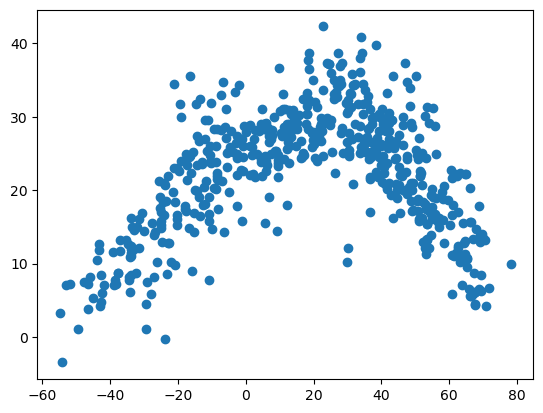

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = "o")

# Incorporate the other graph properties
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature (c)'

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

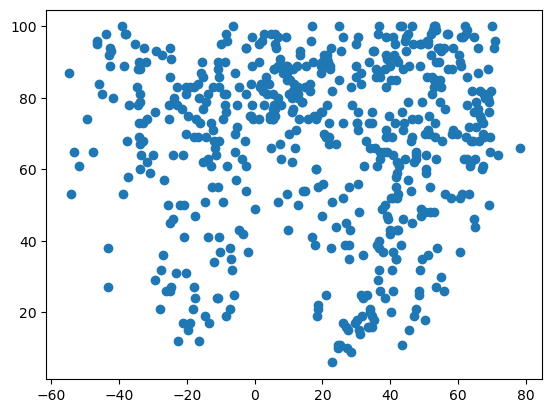

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = "o")

# Incorporate the other graph properties
plt.xlabel = 'Latitude'
plt.ylabel = 'Humidity'

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

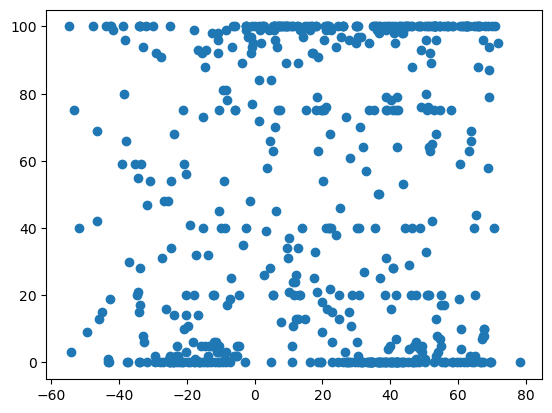

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = "o")

# Incorporate the other graph properties
plt.xlabel = 'Latitude'
plt.ylabel = 'Cloud Coverage'

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

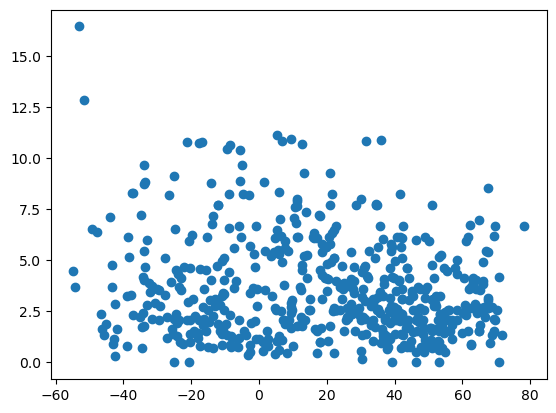

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = "o")

# Incorporate the other graph properties
plt.xlabel = 'Latitude'
plt.ylabel = 'Wind Speed'

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def line_reg(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    


In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kelibia,36.8476,11.0939,26.56,65,0,3.84,TN,1721506018
4,dudinka,69.4058,86.1778,6.30,69,0,6.18,RU,1721506024
5,vorgashor,67.5833,63.9500,4.37,69,8,3.16,RU,1721505771
7,pisz,53.6274,21.8125,17.30,63,96,1.86,PL,1721506028
8,wailua homesteads,22.0669,-159.3780,26.74,73,100,2.68,US,1721505788


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,15.80,86,100,9.14,PN,1721505740
2,puerto natales,-51.7236,-72.4875,7.25,61,40,12.86,CL,1721505749
3,east london,-33.0153,27.9116,14.64,68,94,6.01,ZA,1721506022
6,inverloch,-38.6333,145.7167,7.81,89,80,6.13,AU,1721506026
9,west island,-12.1568,96.8225,26.99,83,20,7.72,CC,1721505752


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3777974726656926


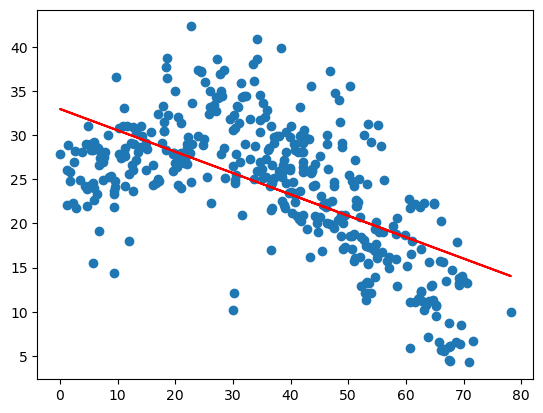

In [61]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature (c)'
line_reg(x_values, y_values)


The r-squared is: 0.5996600200313451


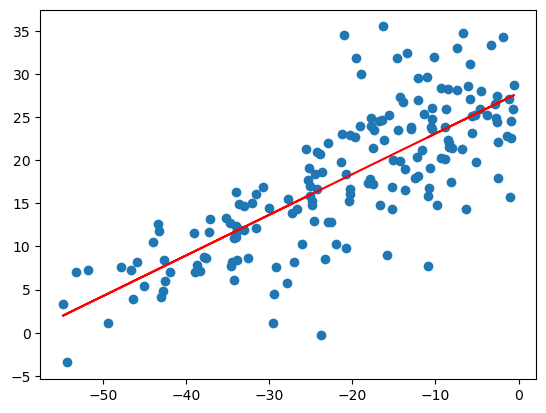

In [62]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature (c)'
line_reg(x_values, y_values)

**Discussion about the linear relationship:** The scatter plots show some correlation between norther and southern hemispheres and maximum temperatures. While the r-values are generally considered low, considering the immense variability between cities grouped in each hemisphere, the correlation of these values can be considered higher than is "normal". In this case, there is small correlation for the northern hemisphere and strong correlation for the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.000242394755016152


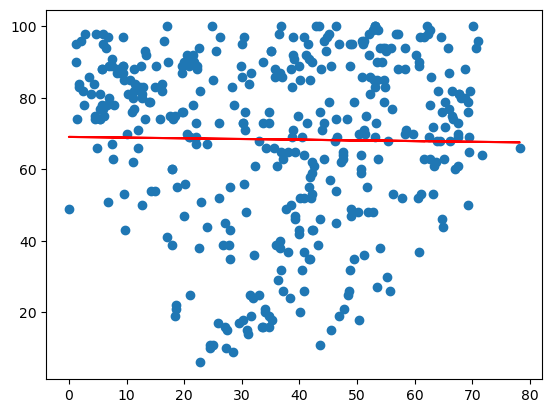

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature (c)'
line_reg(x_values, y_values)

The r-squared is: 0.02118643359986938


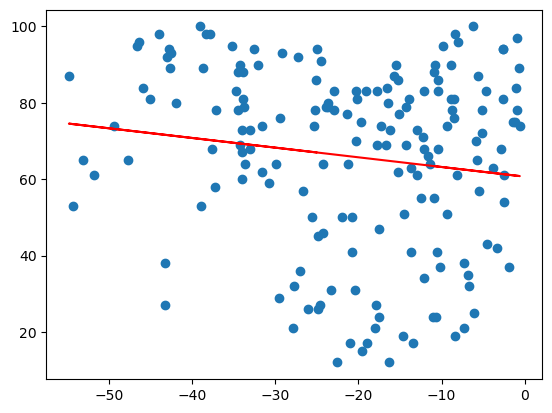

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature (c)'
line_reg(x_values, y_values)

**Discussion about the linear relationship:** Despite the correlation between temperature and hemisphere, the same cannot be said of humidity. There is almost no correlation at all between north and south. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.014708872618239017


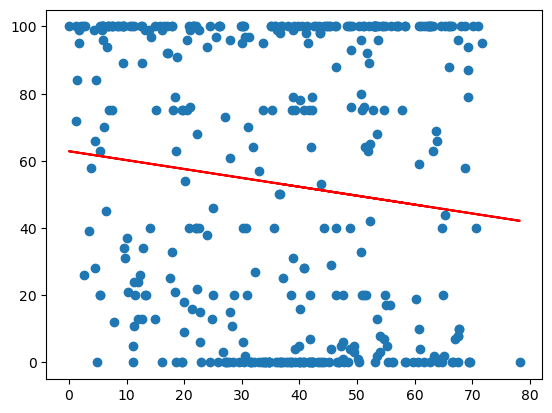

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature (c)'
line_reg(x_values, y_values)

The r-squared is: 0.0005130306361871287


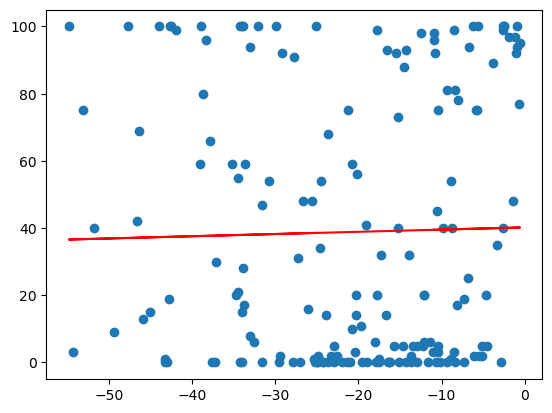

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature (c)'
line_reg(x_values, y_values)

**Discussion about the linear relationship:** Overall cloudiness between northern ans southern hemispheres show the same lack of correlation as humidity. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.047535418090361325


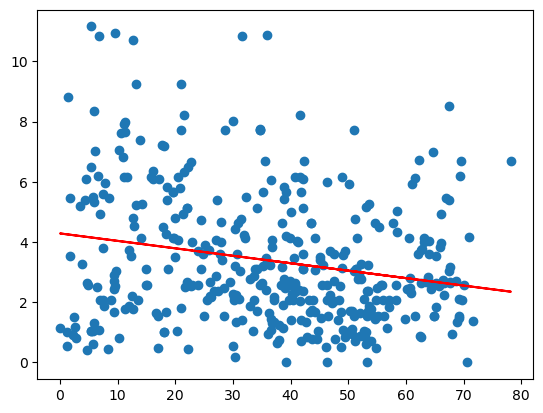

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature (c)'
line_reg(x_values, y_values)

The r-squared is: 0.007663884072015413


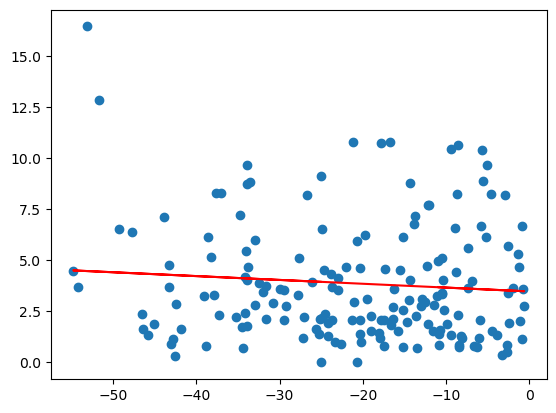

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature (c)'
line_reg(x_values, y_values)

**Discussion about the linear relationship:** There is also no correlation between the northern and southern hemispheres and wind speed. Temperature is the only variable to have any kind of correlation. 